In [396]:
%matplotlib inline

In [397]:
import numpy as np
import matplotlib.pyplot as plt

from random import random, uniform
from scipy import integrate
from scipy.integrate import odeint
from sympy import *

In [398]:
def eq(par, init, t0, tn):
    t = np.arange(t0, tn)

    def fn(y, t):
        a, b, c = y
        u, b1, b2, b3, o1, o2, o3 = par

        da = a*(b1*(1-a-b-c)+o3*c-o1*b-u)
        db = b*(b2*(1-a-b-c)+o1*a-o2*c-u)
        dc = c*(b3*(1-a-b-c)+o2*b-o3*a-u)

        return [da, db, dc]

    ds = odeint(fn, init, t)
    return (ds[:,0], ds[:,1], ds[:,2], t)


In [399]:
# to repeat a randomized run
np.random.seed(680)
# make figures larger
plt.rcParams['figure.figsize'] = (10, 8)

In [400]:
# set initial conditions and parameters here

# uses randomized initial conditions if False
custom_inits = False
# uses randomized parameters if False
custom_params = True

if custom_inits:
    # set these to whatever
    pa, pb, pc = .45, .45, .1
else:
    # nil 
    pa, pb, pc, nil = np.random.uniform(size=(1,4)).tolist()[0]
    total = pa + pb + pc + nil
    
    # makes sure that population adds to 1
    pa /= total
    pb /= total
    pc /= total
    
    print(pa, pb, pc)
    
if custom_params:
    u = 0.2
    b1, b2, b3 = .4, .45, .35
    o1, o2, o3 = .5, .3, .4
else:
    u = np.abs(np.random.normal(0, 1/3))
    b1, b2, b3 = np.random.uniform(size=(1,3)).tolist()[0]
    o1, o2, o3 = np.random.uniform(-1, 1, size=(1,3)).tolist()[0]
    print(u, b1, b2, b3, o1, o2, o3)
    
# run simulation on this interval
startval = 0
stopval = 1000

# it's fine if they sum to a value less than 1
assert pa + pb + pc <= 1
assert 0 <= u <= 1
assert 0 <= b1 <= 1
assert 0 <= b2 <= 1
assert 0 <= b3 <= 1
assert -1 <= o1 <= 1
assert -1 <= o2 <= 1
assert -1 <= o3 <= 1


0.3094746952208624 0.49793222406649373 0.1512082582569813


In [401]:
az, bz, cz, tz = eq([u,b1,b2,b3,o1,o2,o3], [pa,pb,pc], startval, stopval)

a, b, c = symbols('a b c')
mu = symbols('mu')
beta1, beta2, beta3 = symbols('beta1 beta2 beta3')
omega1, omega2, omega3 = symbols('omega1 omega2 omega3')

substs = [(mu, u), (beta1, b1), (beta2, b2), (beta3, b3), (omega1, o1), (omega2, o2), (omega3, o3)]

E1 = 1-mu/beta1
E2 = 1-mu/beta2
E3 = 1-mu/beta3

E4 = Matrix(
         [[       -beta1,    -(beta1+omega1),    mu-beta1 ],
          [ omega1-beta2,             -beta2,    mu-beta2 ]]
     )
E4 = solve_linear_system(E4, a, b)

E5 = Matrix( 
         [[       -beta2,    -(beta2+omega2),    mu-beta2 ],
          [ omega2-beta3,    -beta3,             mu-beta3 ]]
     )
E5 = solve_linear_system(E5, a, c)

E6 = Matrix( 
         [[          -beta1,    omega3-beta1,     mu-beta1 ],
          [ -(beta3+omega3),    -beta3,           mu-beta3 ]]
     )
E6 = solve_linear_system(E6, b, c)

E7 = Matrix( 
         [[ -beta1,             -(beta1+omega1),    omega3-beta1,       mu-beta1 ],
          [ omega1-beta2,       -beta2,             -(beta2+omega2),    mu-beta2 ],
          [ -(beta3+omega3),    omega2-beta3,       -beta3,             mu-beta3 ]]
     )
E7 = solve_linear_system(E7, a, b, c)


In [402]:
print('E0: ({:.2f}, {:.2f}, {:.2f})'.format(0, 0, 0))
print('E1: ({:.2f}, {:.2f}, {:.2f})'.format(E1.subs(substs), 0, 0))
print('E2: ({:.2f}, {:.2f}, {:.2f})'.format(0, E2.subs(substs), 0))
print('E3: ({:.2f}, {:.2f}, {:.2f})'.format(0, 0, E3.subs(substs)))
print('E4: ({:.2f}, {:.2f}, {:.2f})'.format(E4[a].subs(substs), E4[b].subs(substs), 0))
print('E5: ({:.2f}, {:.2f}, {:.2f})'.format(E5[a].subs(substs), 0, E5[c].subs(substs)))
print('E6: ({:.2f}, {:.2f}, {:.2f})'.format(0, E6[b].subs(substs), E6[c].subs(substs)))
print('E7: ({:.2f}, {:.2f}, {:.2f})'.format(E7[a].subs(substs), E7[b].subs(substs), E7[c].subs(substs)))

E0: (0.00, 0.00, 0.00)
E1: (0.50, 0.00, 0.00)
E2: (0.00, 0.56, 0.00)
E3: (0.00, 0.00, 0.43)
E4: (-0.60, 0.49, 0.00)
E5: (-0.21, 0.00, 0.46)
E6: (0.00, 0.50, -0.64)
E7: (0.08, 0.19, 0.23)


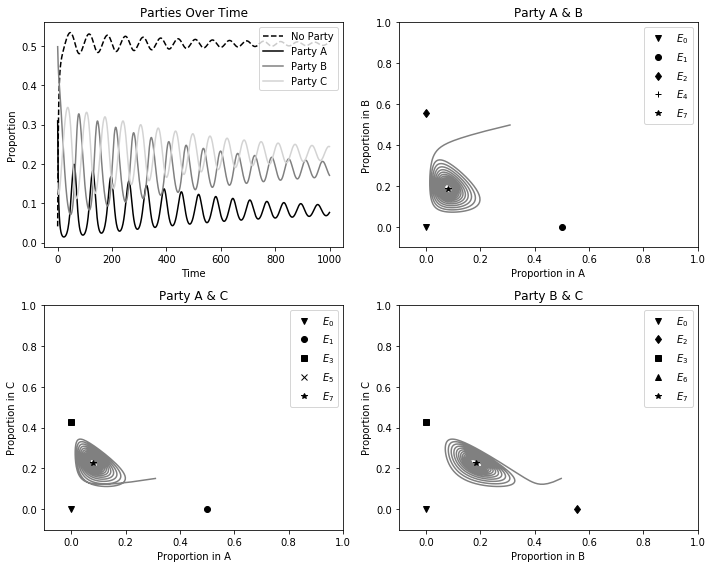

In [403]:
# create 2x2 matrix of figures
fig, axarr = plt.subplots(2, 2)

# top left figure

# label the graph 
axarr[0, 0].set_title('Parties Over Time')
axarr[0, 0].set_xlabel('Time')
axarr[0, 0].set_ylabel('Proportion')
# plot no party
axarr[0, 0].plot(1-az-bz-cz, 'k--', label='No Party')
# plot party A
axarr[0, 0].plot(az, 'k-', label='Party A')
# plot party B
axarr[0, 0].plot(bz, color='gray', label='Party B')
# plot party C
axarr[0, 0].plot(cz, color='lightgray', label='Party C')
# create legend
axarr[0, 0].legend()

# top right figure

# labels
axarr[0, 1].set_title('Party A & B')
axarr[0, 1].set_xlabel('Proportion in A')
axarr[0, 1].set_ylabel('Proportion in B')
# plot x and y on the interval [0.1, 1] so that equilibria on axes can be seen better
axarr[0, 1].set_xlim(-0.1, 1)
axarr[0, 1].set_ylim(-0.1, 1)
# plot A vs. B graph
axarr[0, 1].plot(az, bz, color='gray')
# plot E0, E1, E2, E4, and E7
axarr[0, 1].plot([0], [0], 'kv', label='$E_0$')
axarr[0, 1].plot([E1.subs(substs)], [0], 'ko', label='$E_1$')
axarr[0, 1].plot([0], [E2.subs(substs)], 'kd', label='$E_2$')
axarr[0, 1].plot([E4[a].subs(substs)], [E4[b].subs(substs)], 'k+', label='$E_4$')
axarr[0, 1].plot([E7[a].subs(substs)], [E7[b].subs(substs)], 'k*', label='$E_7$')
# create legend
axarr[0, 1].legend()

axarr[1, 0].set_title('Party A & C')
axarr[1, 0].set_xlabel('Proportion in A')
axarr[1, 0].set_ylabel('Proportion in C')
axarr[1, 0].set_xlim(-0.1, 1)
axarr[1, 0].set_ylim(-0.1, 1)
axarr[1, 0].plot(az, cz, color='gray')
axarr[1, 0].plot([0], [0], 'kv', label='$E_0$')
axarr[1, 0].plot([E1.subs(substs)], [0], 'ko', label='$E_1$')
axarr[1, 0].plot([0], [E3.subs(substs)], 'ks', label='$E_3$')
axarr[1, 0].plot([E5[a].subs(substs)], [E5[c].subs(substs)], 'kx', label='$E_5$')
axarr[1, 0].plot([E7[a].subs(substs)], [E7[c].subs(substs)], 'k*', label='$E_7$')
axarr[1, 0].legend()

axarr[1, 1].set_title('Party B & C')
axarr[1, 1].set_xlabel('Proportion in B')
axarr[1, 1].set_ylabel('Proportion in C')
axarr[1, 1].set_xlim(-0.1, 1)
axarr[1, 1].set_ylim(-0.1, 1)
axarr[1, 1].plot(bz, cz, color='gray')
axarr[1, 1].plot([0], [0], 'kv', label='$E_0$')
axarr[1, 1].plot([E2.subs(substs)], [0], 'kd', label='$E_2$')
axarr[1, 1].plot([0], [E3.subs(substs)], 'ks', label='$E_3$')
axarr[1, 1].plot([E6[b].subs(substs)], [E6[c].subs(substs)], 'k^', label='$E_6$')
axarr[1, 1].plot([E7[b].subs(substs)], [E7[c].subs(substs)], 'k*', label='$E_7$')
axarr[1, 1].legend()

fig.tight_layout()
plt.show()


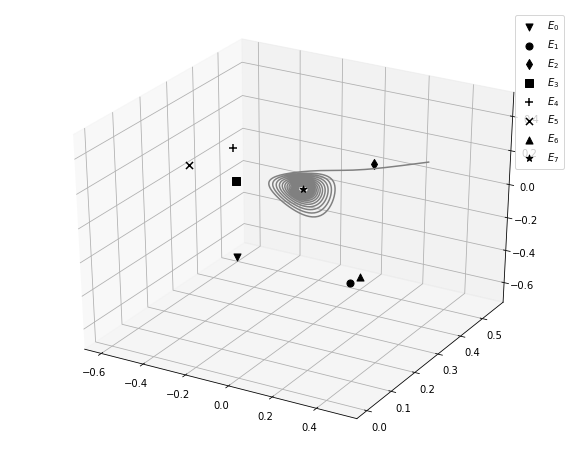

In [408]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(az, bz, cz, c='gray')
ax.scatter([0], [0], [0], c='k', marker='v', s=50, label='$E_0$')
ax.scatter([E1.subs(substs)], [0], [0], c='k', marker='o', s=50, label='$E_1$')
ax.scatter([0], [E2.subs(substs)], [0], c='k', marker='d', s=50, label='$E_2$')
ax.scatter([0], [0], [E3.subs(substs)], c='k', marker='s', s=50, label='$E_3$')
ax.scatter([E4[a].subs(substs)], [E4[b].subs(substs)], [0], c='k', marker='+', s=50, label='$E_4$')
ax.scatter([E5[a].subs(substs)], [0], [E5[c].subs(substs)], c='k', marker='x', s=50, label='$E_5$')
ax.scatter([0], [E6[b].subs(substs)], [E6[c].subs(substs)], c='k', marker='^', s=50, label='$E_6$')
ax.scatter([E7[a].subs(substs)], [E7[b].subs(substs)], [E7[c].subs(substs)], c='k', marker='*', s=50, label='$E_7$')

ax.legend()